In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("C:/Users/Lenovo/Loan_Prediction/train.csv")
test = pd.read_csv("C:/Users/Lenovo/Loan_Prediction/test.csv")

In [3]:
#Makin copy
train_orignal = train.copy()
test_orignal = test.copy()

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
train.shape,test.shape

((614, 13), (367, 12))

In [8]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

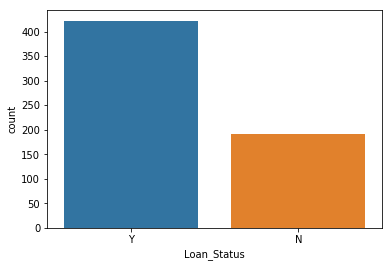

In [10]:
sb.countplot(x='Loan_Status',data = train);

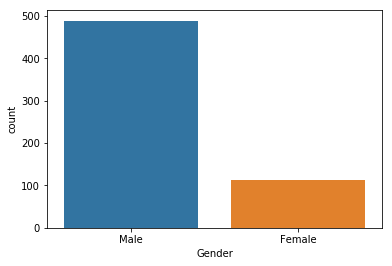

In [11]:
sb.countplot(data = train , x= "Gender");

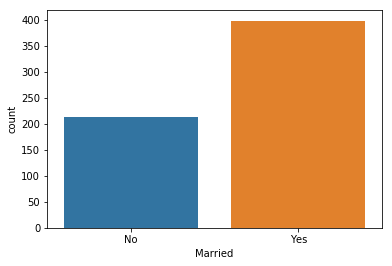

In [12]:
sb.countplot(data = train , x= "Married");

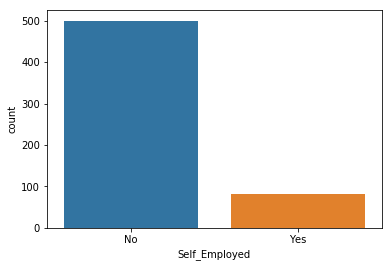

In [13]:
sb.countplot(data = train , x= "Self_Employed");

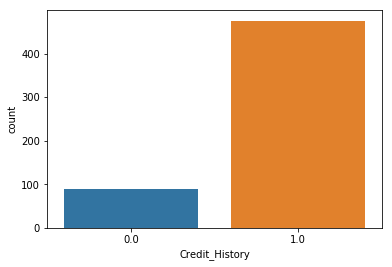

In [14]:
sb.countplot(data = train , x= "Credit_History");

It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts.

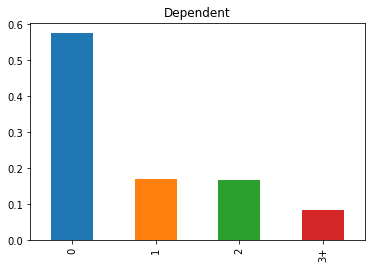

In [15]:
train.Dependents.value_counts(normalize=True).plot.bar(title="Dependent")

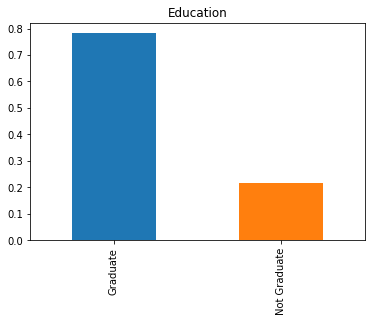

In [16]:
train.Education.value_counts(normalize=True).plot.bar(title="Education")

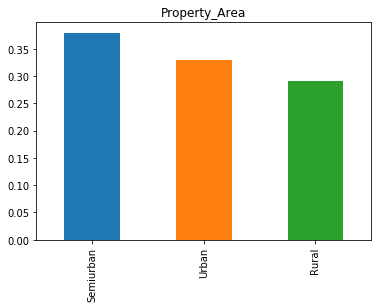

In [17]:
train.Property_Area.value_counts(normalize=True).plot.bar(title = "Property_Area");

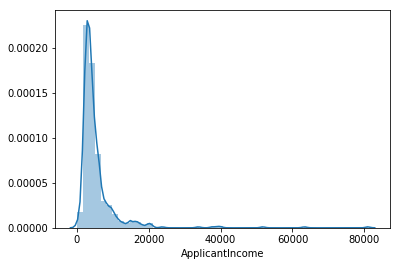

In [18]:
sb.distplot(train['ApplicantIncome']); 

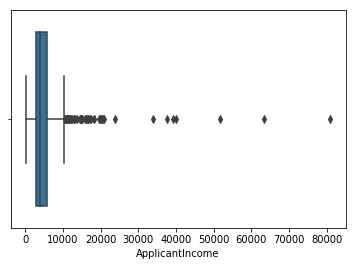

In [19]:
sb.boxplot(train['ApplicantIncome']);

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education

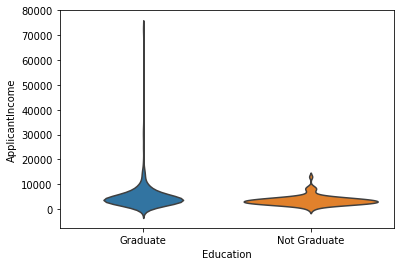

In [20]:
sb.violinplot(data = test , x = "Education" , y = "ApplicantIncome",inner =None)

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

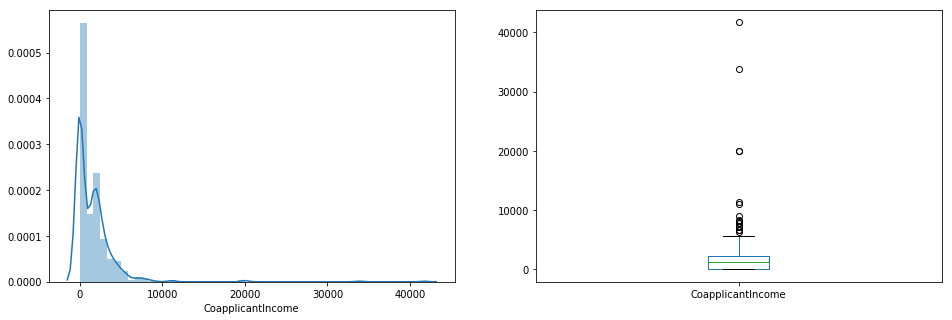

In [21]:
plt.figure(1) 
plt.subplot(121)
sb.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

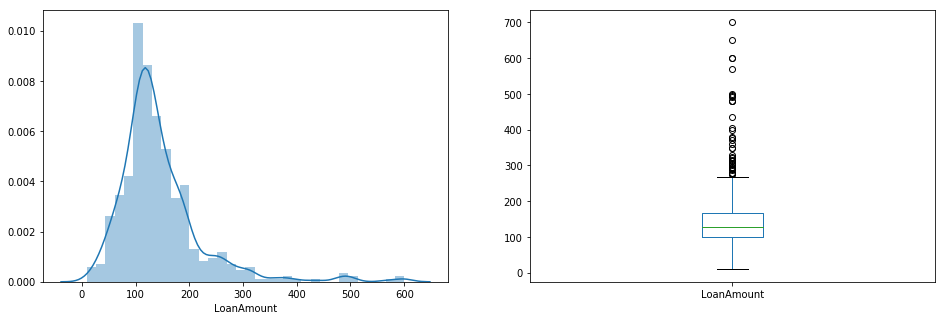

In [22]:
#Loan Amount
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sb.distplot(df['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis

## Bi-Variate Data Analysis

### Some of the Hypotheses
1. Applicants with high income should have more chances of loan approval.
2. Applicants who have repaid their previous debts should have higher chances of loan approval.
3. Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.
4. Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

In [23]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])

In [24]:
"""train.groupby('Gender')['Loan_Status'].value_counts()"""

"train.groupby('Gender')['Loan_Status'].value_counts()"

## Calculating Proportions

In [25]:
#For Calculating Female Proportion for Yes
train.query('Gender == "Female" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Gender == "Female"')['Loan_ID'].count()

0.6696428571428571

In [26]:
train.query('Gender == "Female" and Loan_Status == "N" ')['Loan_ID'].count() /   train.query('Gender == "Female"')['Loan_ID'].count()

0.33035714285714285

In [27]:
#For Calculating Male Proportion
train.query('Gender == "Male" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Gender == "Male"')['Loan_ID'].count()

0.6932515337423313

In [28]:
train.query('Gender == "Male" and Loan_Status == "N" ')['Loan_ID'].count() /   train.query('Gender == "Male"')['Loan_ID'].count()

0.3067484662576687

It can be inferred that the proportion of male and female applicants slightly differ for both approved and unapproved loans.

### Based on Maritial Status

In [29]:
#For Calculating Proportion for Married and Loan Status Yes
train.query('Married == "Yes" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Married == "Yes"')['Loan_ID'].count()

0.7160804020100503

In [30]:
train.query('Married == "Yes" and Loan_Status == "N" ')['Loan_ID'].count() /   train.query('Married == "Yes"')['Loan_ID'].count()

0.28391959798994976

In [31]:
#For Calculating Proportion for Not Married and Loan Status Yes
train.query('Married == "No" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Married == "No"')['Loan_ID'].count()

0.6291079812206573

In [32]:
train.query('Married == "No" and Loan_Status == "N" ')['Loan_ID'].count() /   train.query('Married == "No"')['Loan_ID'].count()

0.37089201877934275

### Based on Dependents

In [33]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [34]:
# Proportion of Loan_Status Yes on  Dependents=0
train.query('Dependents == "0" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Dependents == "0"')['Loan_ID'].count()

0.6898550724637681

In [35]:
# Proportion of Loan_Status No on  Dependents=0
train.query('Dependents == "0" and Loan_Status == "N" ')['Loan_ID'].count() /   train.query('Dependents == "0"')['Loan_ID'].count()

0.3101449275362319

In [36]:
# Proportion of Loan_Status Yes on  Dependents=1
train.query('Dependents == "1" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Dependents == "1"')['Loan_ID'].count()

0.6470588235294118

In [37]:
# Proportion of Loan_Status No on  Dependents=1
train.query('Dependents == "1" and Loan_Status == "N" ')['Loan_ID'].count() /   train.query('Dependents == "1"')['Loan_ID'].count()

0.35294117647058826

In [38]:
# Proportion of Loan_Status Yes on  Dependents=2
train.query('Dependents == "2" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Dependents == "2"')['Loan_ID'].count()

0.7524752475247525

In [39]:
# Proportion of Loan_Status Yes on  Dependents=2
train.query('Dependents == "2" and Loan_Status == "N" ')['Loan_ID'].count() /   train.query('Dependents == "2"')['Loan_ID'].count()

0.24752475247524752

In [40]:
# Proportion of Loan_Status Yes on  Dependents=3+
train.query('Dependents == "3+" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Dependents == "3+"')['Loan_ID'].count()

0.6470588235294118

In [41]:
# Proportion of Loan_Status No  on  Dependents=3+
train.query('Dependents == "3+" and Loan_Status == "N" ')['Loan_ID'].count() /   train.query('Dependents == "3+"')['Loan_ID'].count()

0.35294117647058826

### Based on Education

In [42]:
train.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [43]:
# Proportion of Loan_Status Yes  on  Education = Graduate
train.query('Education == "Graduate" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Education == "Graduate"')['Loan_ID'].count()

0.7083333333333334

In [44]:
# Proportion of Loan_Status No  on  Education = Graduate
train.query('Education == "Graduate" and Loan_Status == "N" ')['Loan_ID'].count() /   train.query('Education == "Graduate"')['Loan_ID'].count()

0.2916666666666667

In [45]:
# Proportion of Loan_Status Yes  on  Education = Not Graduate
train.query('Education == "Not Graduate" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Education == "Not Graduate"')['Loan_ID'].count()

0.6119402985074627

In [46]:
# Proportion of Loan_Status Yes  on  Education = Not Graduate
train.query('Education == "Not Graduate" and Loan_Status == "N" ')['Loan_ID'].count() /   train.query('Education == "Not Graduate"')['Loan_ID'].count()

0.3880597014925373

### Based on Self_Employed

In [47]:
train.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [48]:
# Proportion of Loan_Status Yes  on  Self Employed = Yes
train.query('Self_Employed == "Yes" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Self_Employed == "Yes"')['Loan_ID'].count()

0.6829268292682927

In [49]:
# Proportion of Loan_Status Yes  on  Self Employed = Yes
train.query('Self_Employed == "No" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Self_Employed == "No"')['Loan_ID'].count()

0.686

- Proportion of married applicants is higher for the approved loans.
- Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

### Based on Credit History

In [50]:
train.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [51]:
# Proportion of Loan_Status Yes  on  Credit_History = 1.0
train.query('Credit_History == "1.0" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Credit_History == "1.0"')['Loan_ID'].count()

0.7957894736842105

In [52]:
# Proportion of Loan_Status Yes  on  Credit_History = 1.0
train.query('Credit_History == "1.0" and Loan_Status == "N" ')['Loan_ID'].count() /   train.query('Credit_History == "1.0"')['Loan_ID'].count()

0.20421052631578948

In [53]:
# Proportion of Loan_Status Yes  on  Credit_History = 0.0
train.query('Credit_History == "0.0" and Loan_Status == "Y" ')['Loan_ID'].count() /   train.query('Credit_History == "0.0"')['Loan_ID'].count()

0.07865168539325842

In [54]:
# Proportion of Loan_Status No  on  Credit_History = 0.0
train.query('Credit_History == "0.0" and Loan_Status == "N" ')['Loan_ID'].count() /   train.query('Credit_History == "0.0"')['Loan_ID'].count()

0.9213483146067416

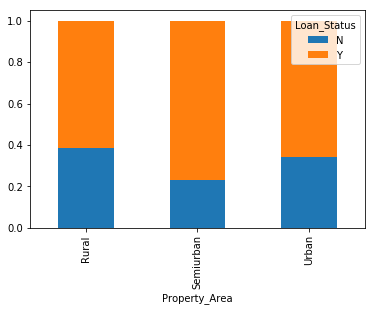

In [55]:
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

- It seems people with credit history as 1 are more likely to get their loans approved.
- Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

### Numerical Independent Variable vs Target Variable

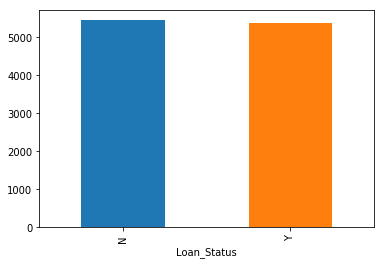

In [56]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

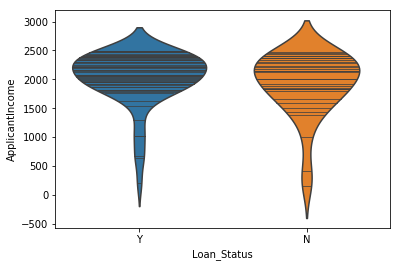

In [57]:
df1 = train.query('ApplicantIncome < 2500')
sb.violinplot(data = df1 , x = "Loan_Status" , y = "ApplicantIncome",inner = 'stick')

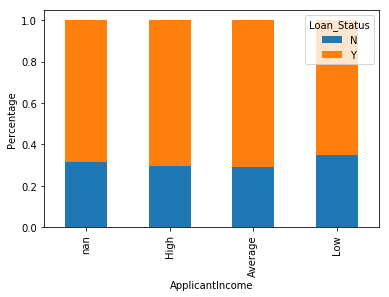

In [58]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

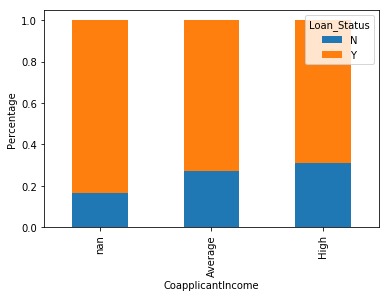

In [59]:
bins=[0,1000,3000,42000]
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

In [60]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

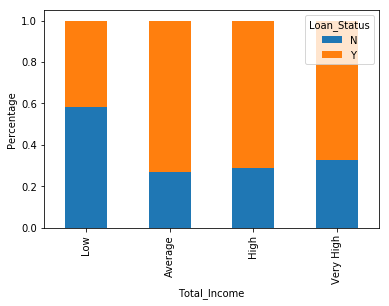

In [61]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Very High','High','Low', 'Average']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

## Let’s visualize the Loan amount variable.

In [62]:
train.LoanAmount.min(),train.LoanAmount.max(),train.LoanAmount.mean()

(9.0, 700.0, 146.41216216216216)

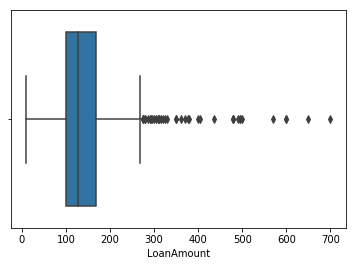

In [63]:
sb.boxplot(train['LoanAmount']);

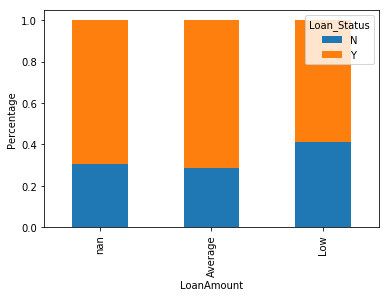

In [64]:
bins=[0,100,200,700]
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')


In [65]:
#For Proportion of LowerAmount for lowerAmount
train.query('LoanAmount < 110 and Loan_Status == "Y" ')['Loan_ID'].count() / train.query('LoanAmount < 110')['Loan_ID'].count()

0.6902173913043478

In [66]:
#For Proportion of LowerAmount for average amount
train.query('LoanAmount > 110 and LoanAmount < 180 and Loan_Status == "Y" ')['Loan_ID'].count() / train.query('LoanAmount > 110 and LoanAmount < 180 ')['Loan_ID'].count()

0.7159090909090909

In [67]:
#For Proportion of LowerAmount for lowerAmount
train.query('LoanAmount > 180 and Loan_Status == "Y" ')['Loan_ID'].count() / train.query('LoanAmount > 180')['Loan_ID'].count()

0.6528925619834711

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.



In [68]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [69]:
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

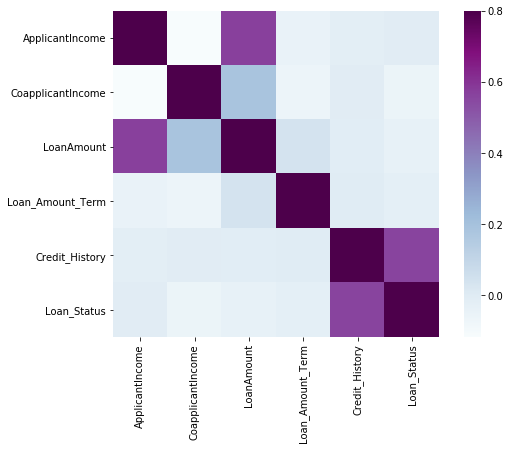

In [70]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sb.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

In [71]:
train.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [72]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- There are missing values in Gender, Married,Dependents,Self_Employed,LoanAmount, Loan_Amount_Term and Credit_History features. 

-We will treat the missing values in all the features one by one.

1. We can consider these methods to fill the missing values:

- For numerical variables: imputation using mean or median
- For categorical variables: imputation using mode

In [73]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [74]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [75]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [76]:
train.LoanAmount.fillna(train.LoanAmount.median(),inplace = True)

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [78]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

## Outlier Treatment

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

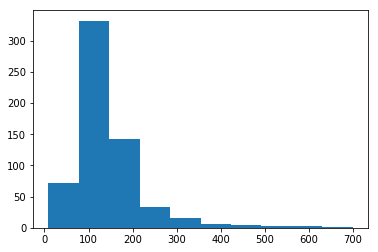

In [79]:
plt.hist(train['LoanAmount']);

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

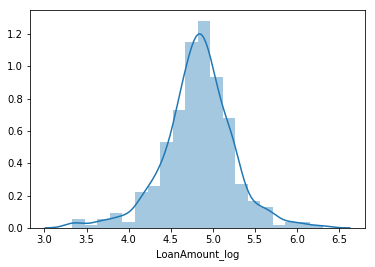

In [80]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])
sb.distplot(test['LoanAmount_log'],bins = 20);

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

## Model Building

In [81]:
train = train.drop('Loan_ID',axis = 1)
test = test.drop('Loan_ID',axis = 1)

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

In [82]:
#dropping loan status from x and keeping in y
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [83]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


Now we will make dummy variables for the categorical variables.
- Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.
- Consider the “Gender” variable. It has two classes, Male and Female.
- As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
- Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
- Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [84]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [85]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,4.700480,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4.836282,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,5.337538,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4.605170,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,4.356709,0,1,1,0,...,1,0,0,0,1,1,0,0,0,1


Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

In [86]:
from sklearn.model_selection import train_test_split

x_train , x_cv ,y_train , y_cv = train_test_split(X , y , test_size = 0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

In [87]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [88]:
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,penalty='l2', random_state=1, solver='liblinear', tol=0.0001,verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization. 

Let’s predict the Loan_Status for validation set and calculate its accuracy.

In [90]:
pred_cv = model.predict(x_cv)

let us calculate how accurate our predictions are by calculating the accuracy.

In [91]:
accuracy_score(y_cv,pred_cv)

0.8216216216216217

So our predictions are almost 80% accurate, i.e. we have identified 80% of the loan status correctly.

Let’s make predictions for the test dataset.

In [92]:
pred_test1 = model.predict(test)

ValueError: X has 21 features per sample; expecting 20

(614, 20)

In [ ]:
submission = pd.read_csv("C:/Users/Lenovo/Loan_Prediction/Sample_Submission.csv")

We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.



In [ ]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
test_orignal.head()